In [12]:
library(ggplot2)
library(data.table)
library(dplyr)

# Data

In [13]:
no2_results <- "/home/pieter/Documents/GemeenteNijmegen/smartemission/etl/calibration/io/performance/001475261709_NO2_Waarden_grid_search_scores.csv"

In [14]:
data <- data.table(read.csv(no2_results))
head(data)

X,mean_test_score,param_filter__alpha,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,param_mlp__learning_rate_init,param_mlp__max_iter,param_mlp__solver,⋯,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,std_test_score
0,-13.33640,6.112053e-02,logistic,3.153243e-06,17,constant,5.952536e-02,200,lbgfs,⋯,-12.33144,-13.92395,-13.27063,-13.36870,-14.06885,-12.40066,-13.48103,-13.94198,-13.24033,0.5934370
1,-13.05526,1.039908e-01,relu,9.356519e-05,108,constant,2.126568e-02,200,lbgfs,⋯,-12.13103,-13.59999,-13.00008,-13.03497,-13.77000,-12.34085,-13.21378,-13.53892,-12.86777,0.5238556
2,-13.70313,1.707125e-05,relu,3.043771e-03,107,constant,1.652078e-02,200,lbgfs,⋯,-13.04283,-14.27874,-13.48455,-13.63123,-14.19040,-13.21581,-13.40823,-14.12837,-13.94804,0.4246522
3,-13.05856,6.881655e-03,relu,2.648711e-05,32,constant,5.119780e-06,200,lbgfs,⋯,-12.10825,-14.06360,-13.10626,-12.87934,-13.74295,-12.01425,-12.97702,-13.52940,-13.10600,0.6443901
4,-13.90488,4.260731e-04,logistic,4.433844e-06,41,constant,2.403778e-04,200,lbgfs,⋯,-13.23089,-14.50898,-14.00719,-13.71292,-14.40676,-13.25398,-13.72837,-14.27401,-14.02086,0.4375335
5,-13.31827,1.922321e-05,tanh,1.987709e-04,136,constant,1.983185e-03,200,lbgfs,⋯,-12.74424,-13.71191,-13.50236,-13.18195,-13.98057,-12.60529,-12.84065,-13.60942,-13.68804,0.4635057


# Best 

In [15]:
best_df <- data %>% 
    filter(mean_test_score > -12) %>%
    select(params)
best_df

params
"{'mlp__learning_rate': 'constant', 'mlp__activation': 'tanh', 'mlp__alpha': 1.4312431413452899e-05, 'mlp__learning_rate_init': 4.2639692257501962e-05, 'mlp__hidden_layer_sizes': 71, 'mlp__max_iter': 200, 'mlp__solver': 'lbgfs'}"
"{'mlp__learning_rate': 'constant', 'mlp__activation': 'logistic', 'filter__alpha': 0.014998264318119752, 'mlp__alpha': 8.4838007586808904e-06, 'mlp__learning_rate_init': 0.00023729733377150111, 'mlp__hidden_layer_sizes': 99, 'mlp__max_iter': 200, 'mlp__solver': 'lbgfs'}"
"{'mlp__learning_rate': 'constant', 'mlp__activation': 'relu', 'filter__alpha': 0.028032326862857674, 'mlp__alpha': 0.0004400600399658487, 'mlp__learning_rate_init': 6.0502552537189557e-05, 'mlp__hidden_layer_sizes': 98, 'mlp__max_iter': 200, 'mlp__solver': 'lbgfs'}"


# Parameters

In [16]:
df <- data %>%
    mutate(mean_test_score = abs(mean_test_score),
           rank_test_score = rank(mean_test_score),
           top = min_rank(rank_test_score) < 10, 
           stderr_test_score = std_test_score / sqrt(9), 
           best_filter_range = param_filter__alpha < 0.1 & param_filter__alpha > 0.001) %>%
    select(-X,-params, -starts_with("split"))
params <- setdiff(names(df), "mean_test_score")
df %>% filter(top == TRUE)

mean_test_score,param_filter__alpha,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,param_mlp__learning_rate_init,param_mlp__max_iter,param_mlp__solver,rank_test_score,std_test_score,top,stderr_test_score,best_filter_range
11.84604,0.013580009,tanh,1.431243e-05,71,constant,4.263969e-05,200,lbgfs,1,0.5995404,TRUE,0.1998468,TRUE
12.07591,0.002421579,tanh,4.037411e-05,134,constant,5.827968e-03,200,lbgfs,8,0.5993361,TRUE,0.1997787,TRUE
12.10725,0.061834689,relu,1.354079e-06,66,constant,1.464393e-04,200,lbgfs,9,0.5533099,TRUE,0.1844366,TRUE
12.00708,0.012394158,logistic,4.217769e-03,102,constant,2.097131e-03,200,lbgfs,4,0.6189193,TRUE,0.2063064,TRUE
11.99470,0.014998264,logistic,8.483801e-06,99,constant,2.372973e-04,200,lbgfs,3,0.5581108,TRUE,0.1860369,TRUE
12.01038,0.009690992,relu,1.304711e-05,44,constant,3.046349e-02,200,lbgfs,5,0.5744221,TRUE,0.1914740,TRUE
11.93170,0.028032327,relu,4.400600e-04,98,constant,6.050255e-05,200,lbgfs,2,0.5950623,TRUE,0.1983541,TRUE
12.03976,0.001879771,tanh,1.529359e-02,134,constant,1.073857e-02,200,lbgfs,6,0.5986134,TRUE,0.1995378,TRUE
12.06358,0.010457978,relu,1.733389e-05,41,constant,2.810755e-04,200,lbgfs,7,0.5541696,TRUE,0.1847232,TRUE


# Parameter: filter__alpha
Best scores for  are between 0.1 and 0.001. Average best score is around 0.01.

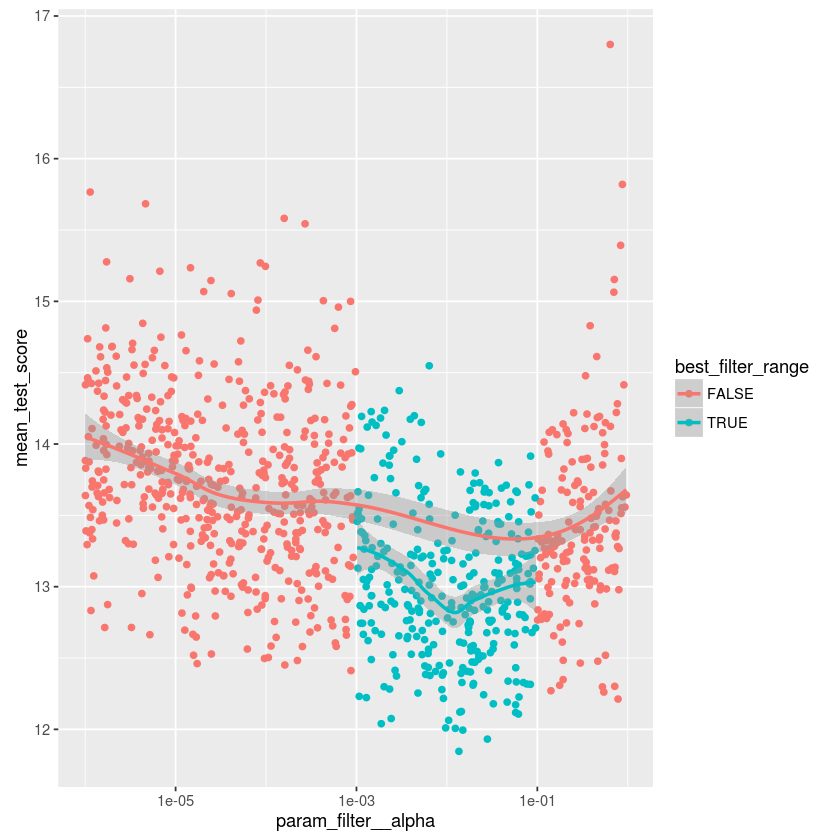

In [17]:
ggplot(df) +
  aes_string(x = params[1], y = "mean_test_score", color = "best_filter_range") +
  geom_point() + 
  scale_x_log10() + 
  geom_smooth() 

# Parameter: mlp__activation
No difference between the algorithms

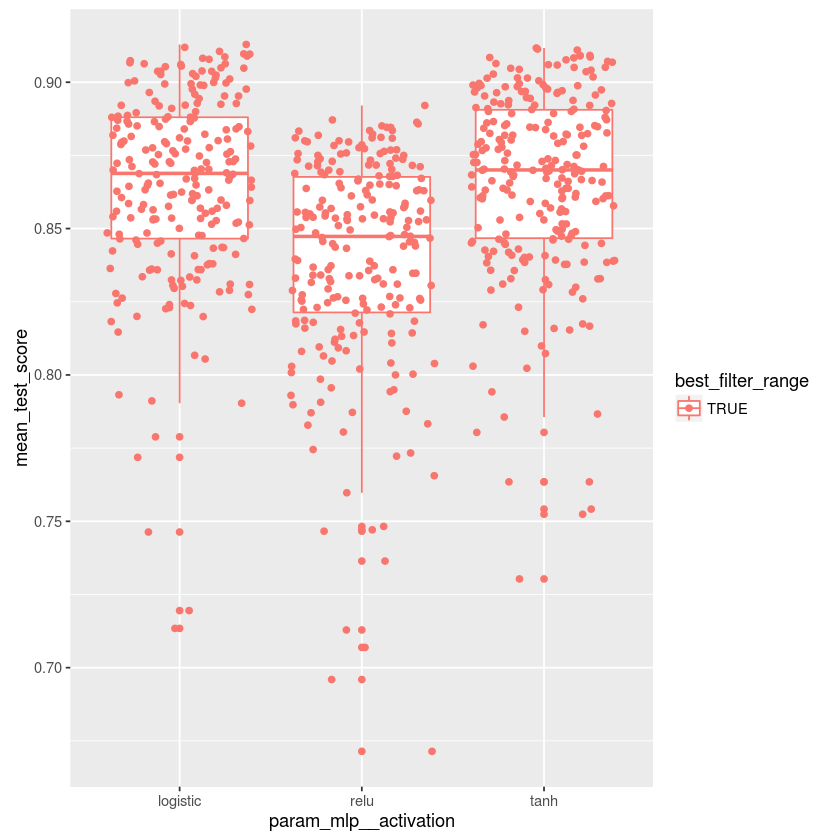

In [9]:
ggplot(df) +
  aes_string(x = params[2], y = "mean_test_score", color = "best_filter_range") +
  geom_boxplot() + 
  geom_jitter()

# Parameter: mlp__alpha
No effect

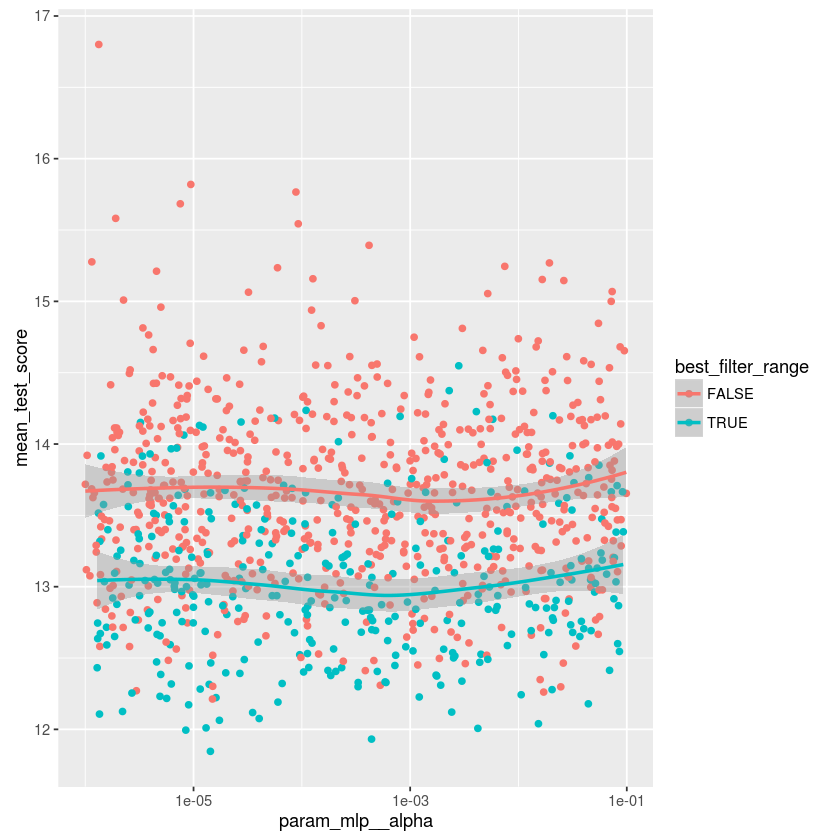

In [104]:
ggplot(df) +
  aes_string(x = params[3], y = "mean_test_score", color = "best_filter_range") +
  geom_point() + 
  scale_x_log10() + 
  geom_smooth() 

# Parameter: mlp__hidden_layer_size
At least hidden layer size of 75

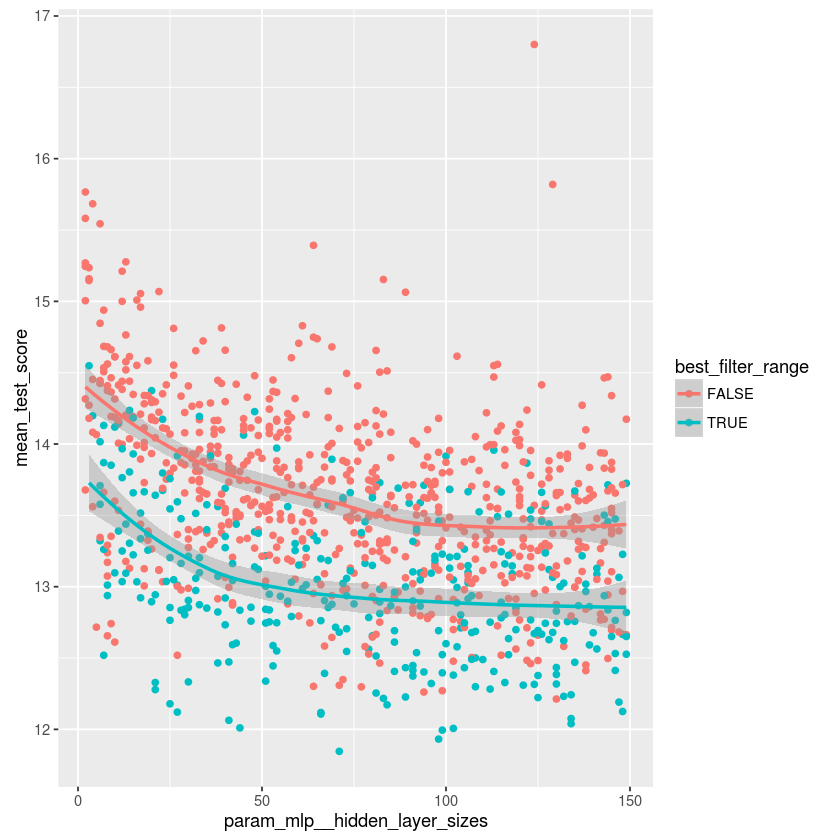

In [105]:
ggplot(df) +
  aes_string(x = params[4], y = "mean_test_score", color = "best_filter_range") +
  geom_point() + 
  geom_smooth() 

# Parameter: mlp__learning_rate_init
No effect

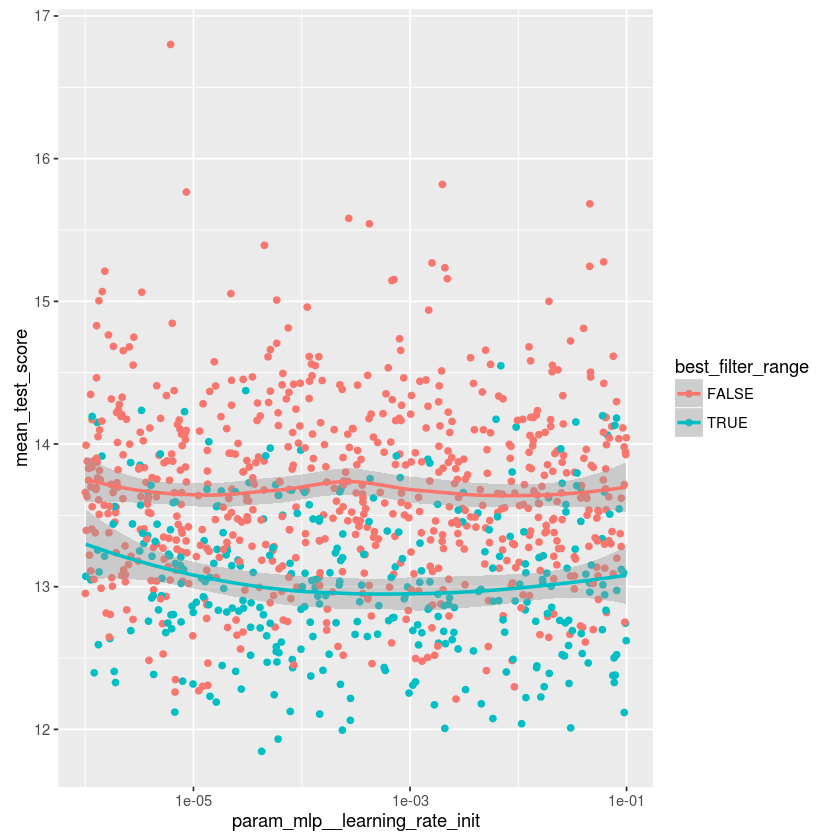

In [107]:
ggplot(df) +
  aes_string(x = params[6], y = "mean_test_score", color = "best_filter_range") +
  geom_point() + 
  scale_x_log10() +
  geom_smooth() 